## Bulk Metallic Glass Metal Matrix Composites
### Introduction
This example uses a data set from directionally aligned BMG-MMC. The high yield strength as well as high elastic strain limits observed from amorphous glasses are of interest in multiple applications. However, the low ductility and fatigue strength of such metals mitigates their use in design critical components. For these practical purposes, metal composites composed of amorphous and crystalline phases have become a pursuit. 

The BMG-MMC in this data set is directionally solidified BMG-MMC which through the use of electromagnets the crystalline phases are aligned within the amorphous matrix. In this example we will be applying commons tools used throughout PyMKS in order to classify the micostructures and hopefully observe degrees of anisotropy throughout the microstructures.


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

### Load in the Data


In [25]:
from pymks_share import DataManager
manager = DataManager('pymks.me.gatech.edu')
X = manager.fetch_data('metallic glass')
# meta = manager.fetch_metadata('metallic glass')


### Lets look at the Microstructure
Below we can see one of the microstructures. We can easily discern the phases of the 

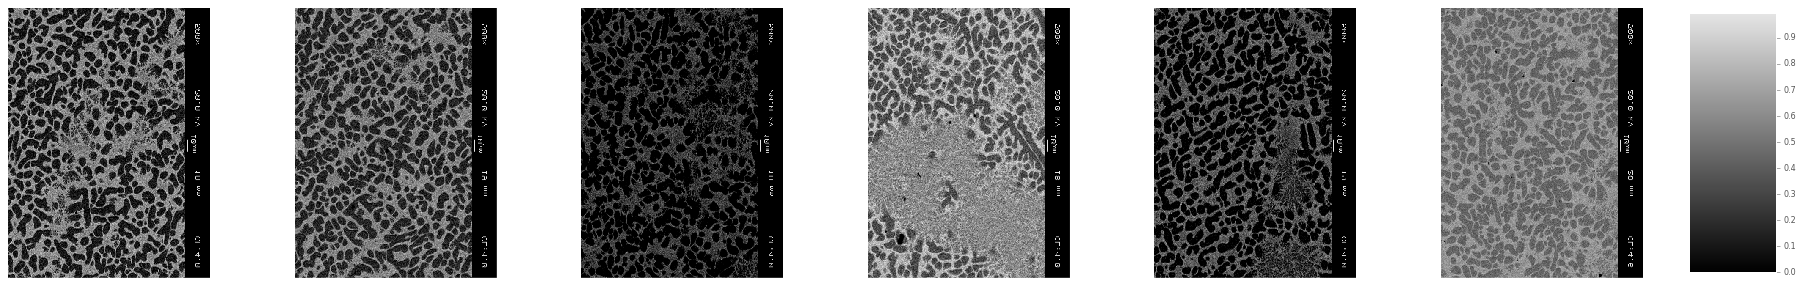

In [40]:
from pymks.tools import draw_microstructures

draw_microstructures(X[i::54 / 6])


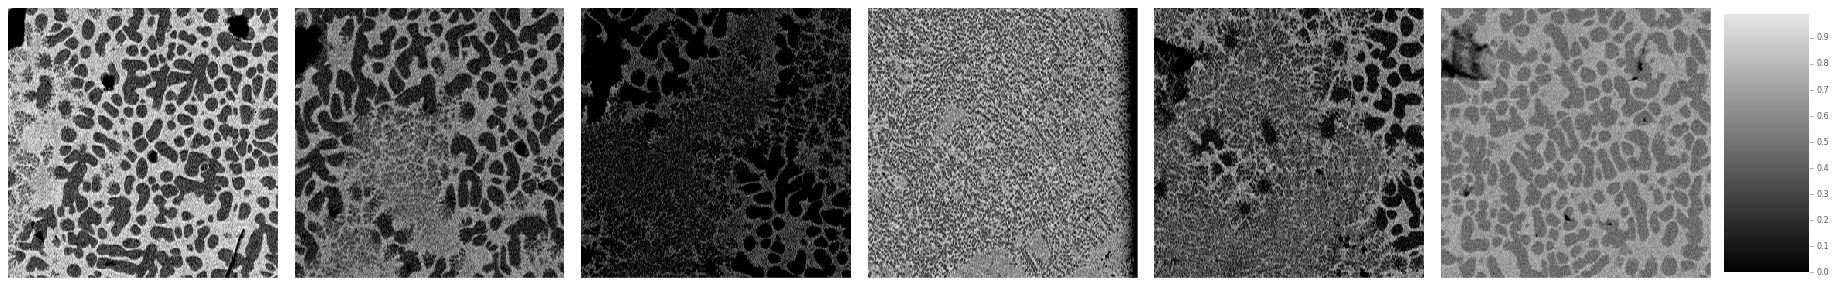

In [41]:
X = X[:, 50:400, :350]

draw_microstructures(X[::54 / 6])

In [42]:
from skimage.filters import threshold_otsu, rank

ostu_values = np.array([threshold_otsu(x) for x in X])
X_seg = X > ostu_values[:, None, None]

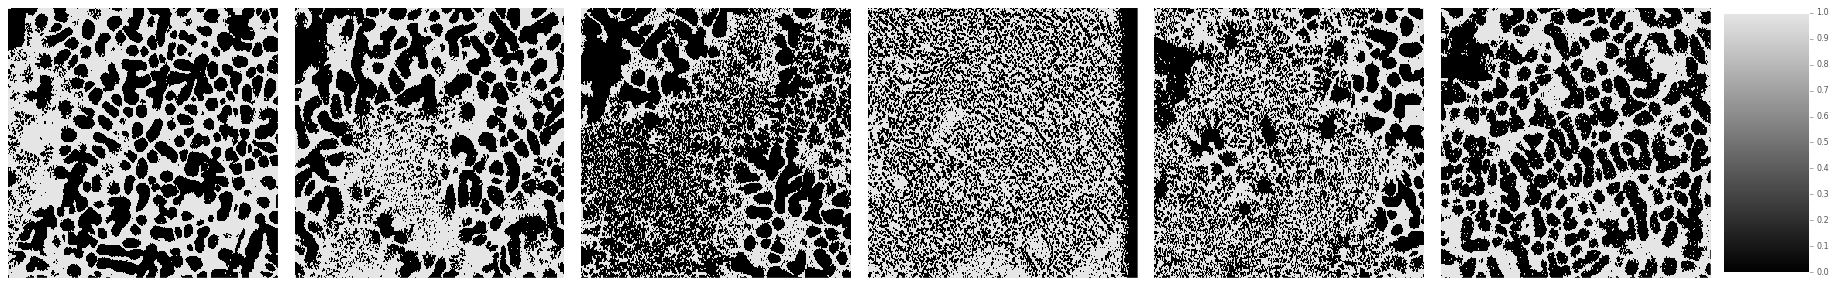

In [43]:
draw_microstructures(X_seg[:: 54 / 6])

## Data Reductive Techniques
We now have a huge data set! We could either compare each and every 2-pt statistics to each other or we could use data reduction techniques in a way to look at the data sets as a whole.

In [13]:
from pymks import MKSStructureAnalysis
from pymks import PrimitiveBasis

prim_basis = PrimitiveBasis(2)
# from pymks.stats import correlate
# from sklearn.base import BaseEstimator
# from sklearn.decomposition import RandomizedPCA
# from sklearn.decomposition import ProjectedGradientNMF
# from sklearn.decomposition import FactorAnalysis
# from sklearn.decomposition import TruncatedSVD
# from sklearn.decomposition import FastICA
# from sklearn.decomposition import fastica

In [44]:
analyzer = MKSStructureAnalysis(prim_basis, correlations=[(1, 1), (0, 1)])
analyzer.fit(X_seg)

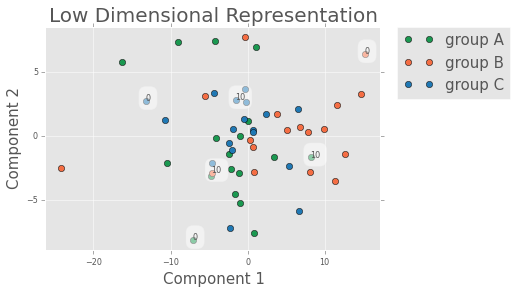

In [46]:
from pymks.tools import draw_components

draw_components(np.array_split(analyzer.fit_data[:, :2], 3),
                ['group A', 'group B', 'group C'], legend_outside=True)

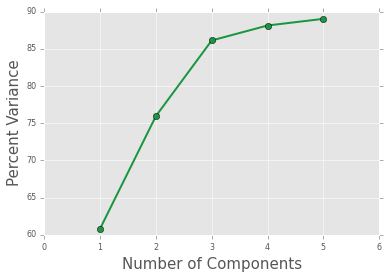

In [47]:
from pymks.tools import draw_component_variance

draw_component_variance(analyzer.dimension_reducer.explained_variance_ratio_)